Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tf2onnx

2025-05-18 20:23:52.532062: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 20:23:52.534669: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 20:23:52.541376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747574632.552590   13452 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747574632.555856   13452 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747574632.565273   13452 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Load Data

In [2]:
# Memuat data obesitas dari file CSV
df = pd.read_csv('../dataset/obesity_data.csv')

# Menampilkan beberapa baris awal dataset
print("Data awal:")
df.head()

Data awal:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Exploratory Data Analysis (EDA)

In [3]:
# Deskripsi statistik data numerik
print("\nStatistik deskriptif:")
df.describe()


Statistik deskriptif:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
# Informasi tentang tipe data dan nilai non-null
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF           

In [5]:
# Menampilkan ukuran dataset (jumlah baris dan kolom)
print(f"\nUkuran dataset: {df.shape[0]} baris x {df.shape[1]} kolom")


Ukuran dataset: 2111 baris x 17 kolom


In [6]:
# Memeriksa nilai yang hilang
nilai_null = df.isnull().sum()
print("\nJumlah nilai yang hilang pada setiap kolom:")
print(nilai_null)

if nilai_null.sum() == 0:
    print("\nDataset tidak memiliki nilai yang hilang!")


Jumlah nilai yang hilang pada setiap kolom:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Dataset tidak memiliki nilai yang hilang!


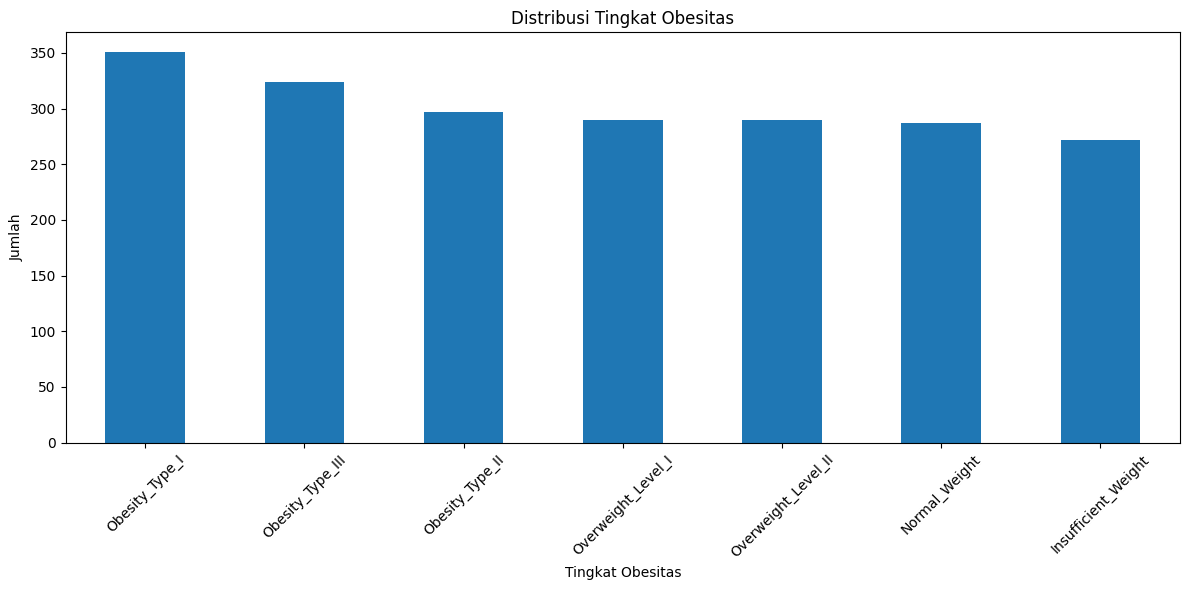

In [7]:
# Visualisasi distribusi kelas target (tingkat obesitas)
plt.figure(figsize=(12, 6))
distribusi_kelas = df['NObeyesdad'].value_counts()
distribusi_kelas.plot(kind='bar')
plt.title('Distribusi Tingkat Obesitas')
plt.ylabel('Jumlah')
plt.xlabel('Tingkat Obesitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
print("\nDistribusi kelas target:")
print(distribusi_kelas)


Distribusi kelas target:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


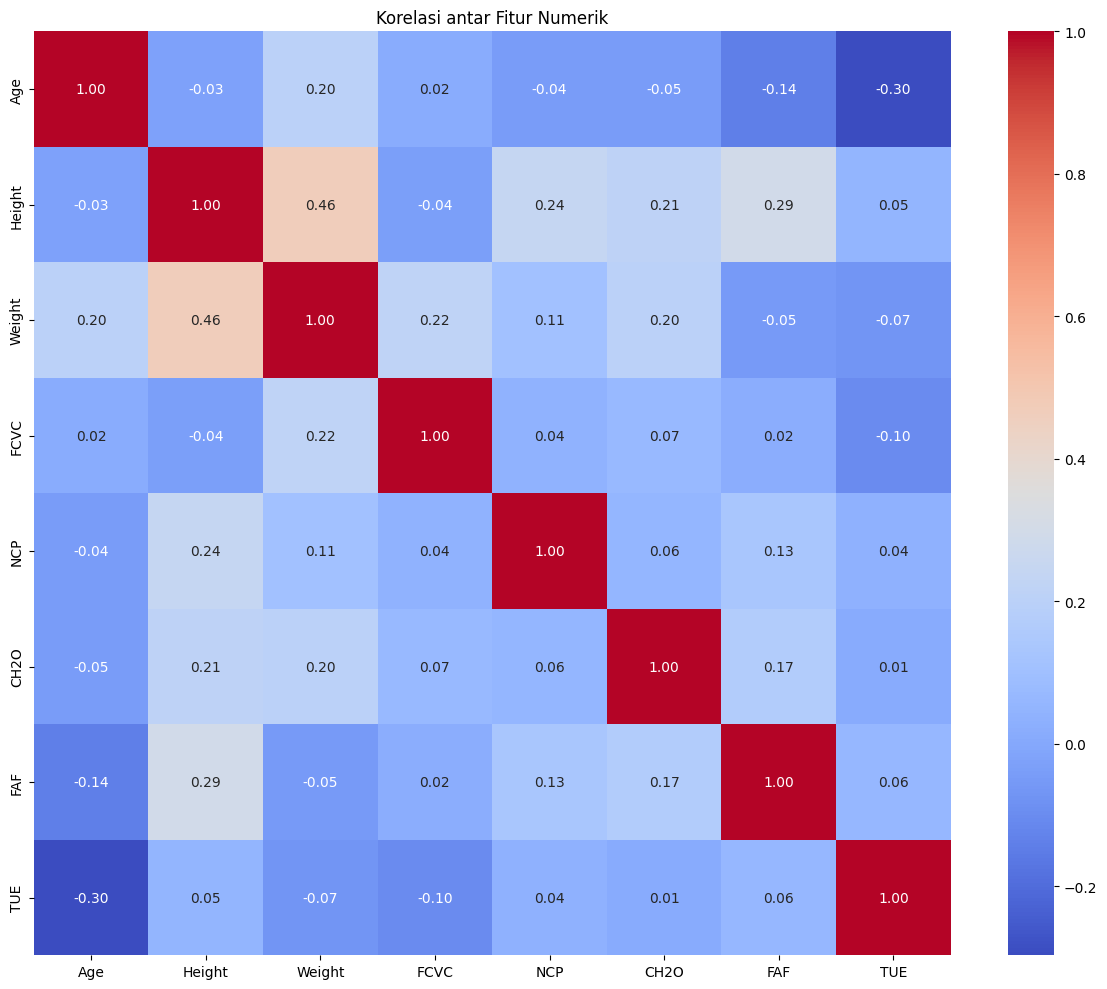

In [9]:
# Visualisasi korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
korelasi = df.corr(numeric_only=True)
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur Numerik')
plt.tight_layout()
plt.show()

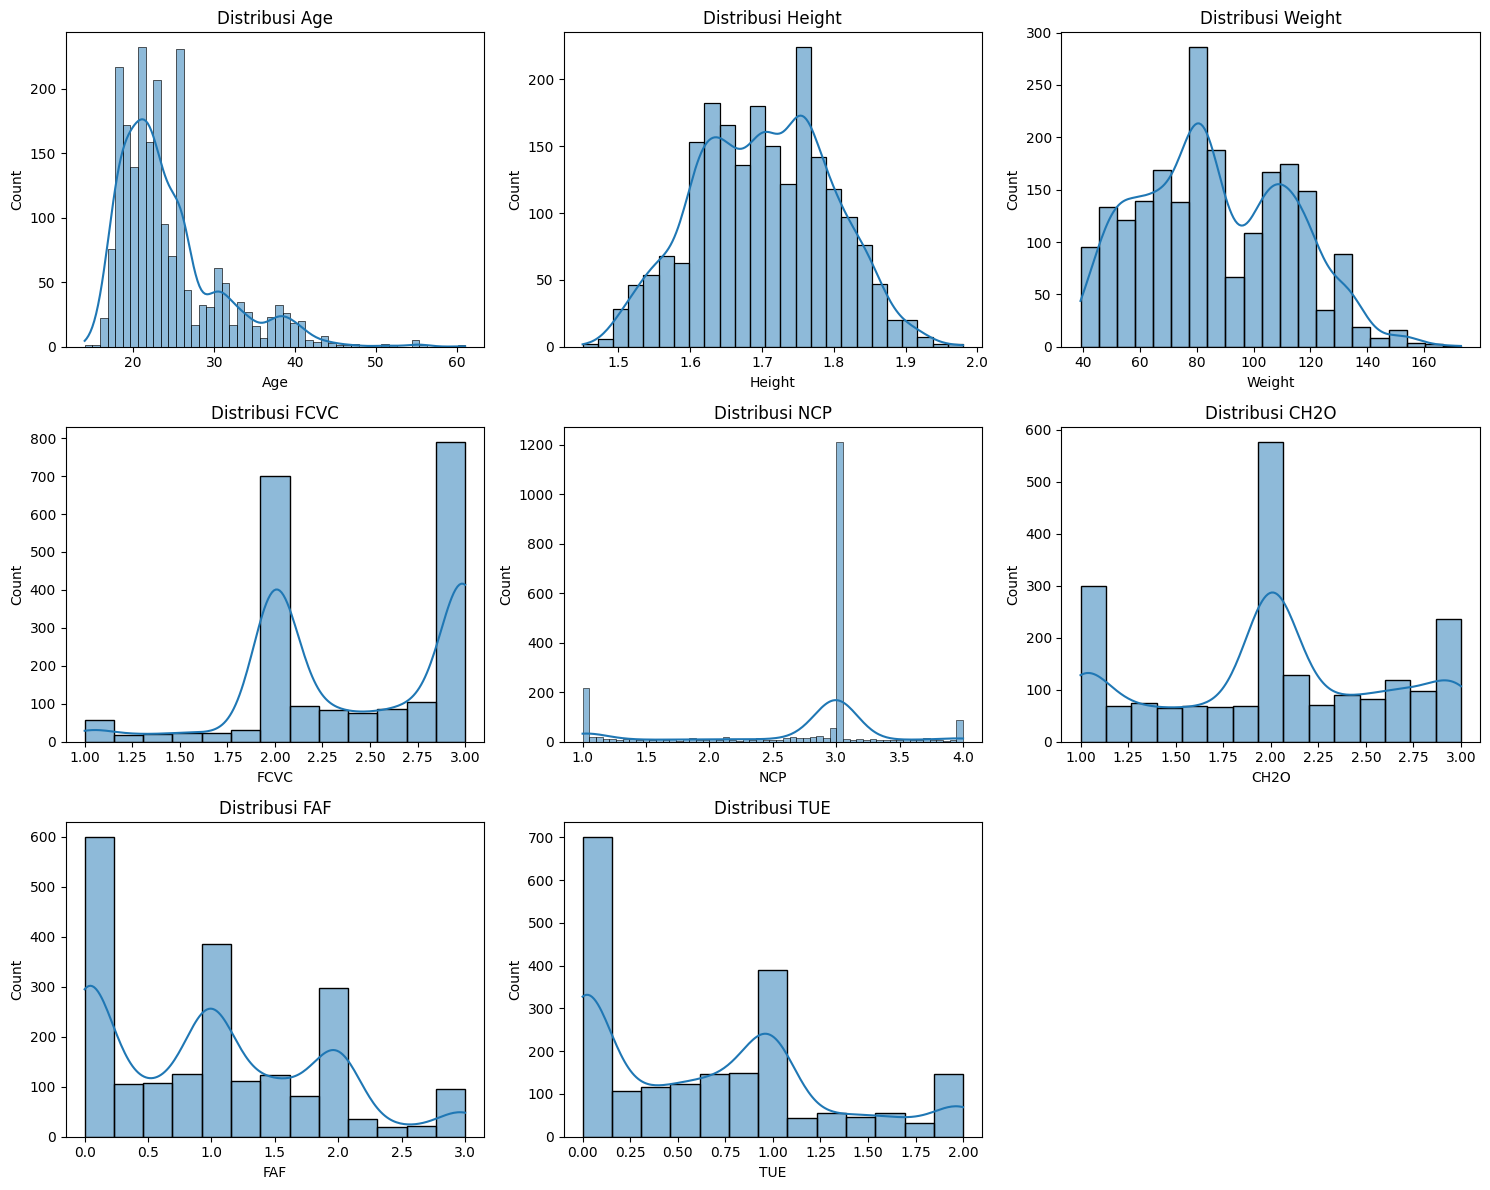

In [10]:
# Distribusi fitur numerik
fitur_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 12))
for i, kolom in enumerate(fitur_numerik):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[kolom], kde=True)
    plt.title(f'Distribusi {kolom}')
plt.tight_layout()
plt.show()

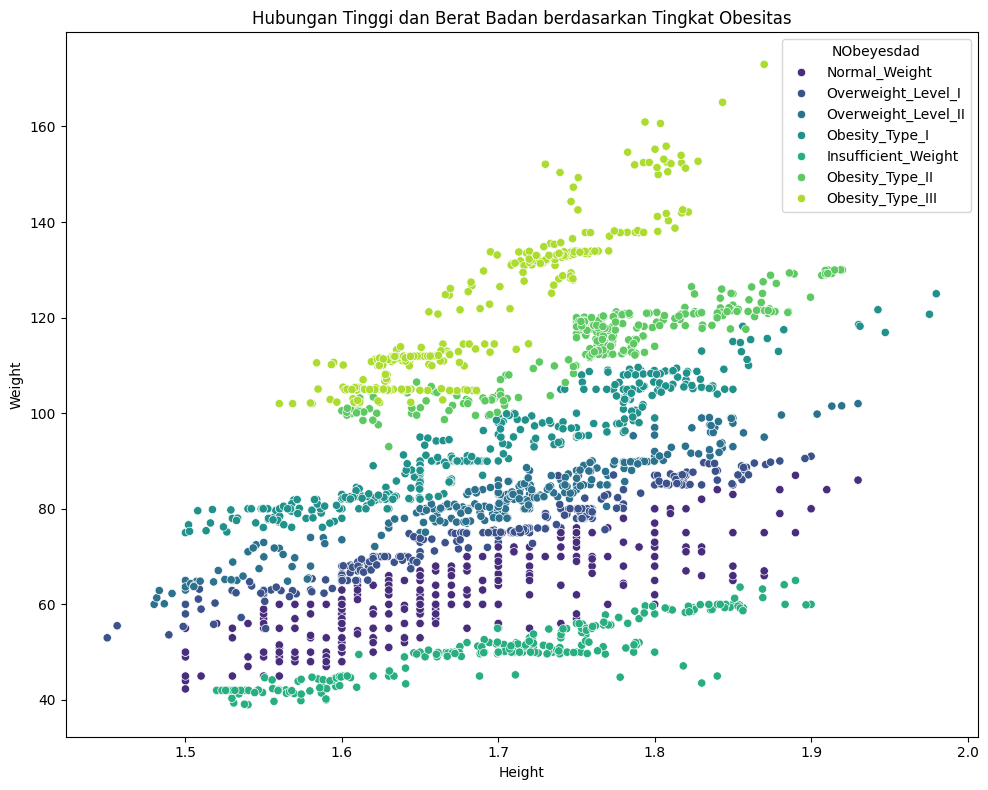

In [11]:
# Hubungan antara berat dan tinggi berdasarkan kelas obesitas
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Height', y='Weight', hue='NObeyesdad', data=df, palette='viridis')
plt.title('Hubungan Tinggi dan Berat Badan berdasarkan Tingkat Obesitas')
plt.tight_layout()
plt.show()

Preprocessing

In [12]:
# === ENCODE FITUR KATEGORIKAL ===
# Kolom kategorikal yang perlu dienkode menjadi numerik
fitur_kategorikal = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                  'SMOKE', 'SCC', 'CALC', 'MTRANS']

print("\nFitur kategorikal yang akan dienkode:")
for kolom in fitur_kategorikal:
    print(f"{kolom}: {df[kolom].unique()}")

# Encode setiap kolom kategorikal ke angka menggunakan LabelEncoder
# Menyimpan encoder untuk digunakan pada data baru nanti
le_dict = {}
for kolom in fitur_kategorikal:
    le = LabelEncoder()
    df[kolom] = le.fit_transform(df[kolom])
    le_dict[kolom] = le
    print(f"Encoding {kolom}: {list(le.classes_)} -> {list(range(len(le.classes_)))}")

# Encode label/target (kelas obesitas)
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
print("\nKelas target setelah encoding:")
for i, kelas in enumerate(label_encoder.classes_):
    print(f"{kelas} -> {i}")


Fitur kategorikal yang akan dienkode:
Gender: ['Female' 'Male']
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Encoding Gender: ['Female', 'Male'] -> [0, 1]
Encoding family_history_with_overweight: ['no', 'yes'] -> [0, 1]
Encoding FAVC: ['no', 'yes'] -> [0, 1]
Encoding CAEC: ['Always', 'Frequently', 'Sometimes', 'no'] -> [0, 1, 2, 3]
Encoding SMOKE: ['no', 'yes'] -> [0, 1]
Encoding SCC: ['no', 'yes'] -> [0, 1]
Encoding CALC: ['Always', 'Frequently', 'Sometimes', 'no'] -> [0, 1, 2, 3]
Encoding MTRANS: ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'] -> [0, 1, 2, 3, 4]

Kelas target setelah encoding:
Insufficient_Weight -> 0
Normal_Weight -> 1
Obesity_Type_I -> 2
Obesity_Type_II -> 3
Obesity_Type_III -> 4
Overweight_Level_I -> 5
Overweight_Lev

In [13]:
# === NORMALISASI FITUR NUMERIK ===
# Standarisasi fitur-fitur numerik untuk meningkatkan kinerja model
print("\nMelakukan standarisasi fitur numerik...")
scaler = StandardScaler()
df[fitur_numerik] = scaler.fit_transform(df[fitur_numerik])

print("\nData setelah preprocessing:")
print(df.head())


Melakukan standarisasi fitur numerik...

Data setelah preprocessing:
        Age  Gender    Height    Weight  CALC  FAVC      FCVC       NCP  SCC  \
0 -0.522124       0 -0.875589 -0.862558     3     0 -0.785019  0.404153    0   
1 -0.522124       0 -1.947599 -1.168077     2     0  1.088342  0.404153    1   
2 -0.206889       1  1.054029 -0.366090     1     0 -0.785019  0.404153    0   
3  0.423582       1  1.054029  0.015808     1     0  1.088342  0.404153    0   
4 -0.364507       1  0.839627  0.122740     2     0 -0.785019 -2.167023    0   

   SMOKE      CH2O  family_history_with_overweight       FAF       TUE  CAEC  \
0      0 -0.013073                               1 -1.188039  0.561997     2   
1      1  1.618759                               1  2.339750 -1.080625     2   
2      0 -0.013073                               1  1.163820  0.561997     2   
3      0 -0.013073                               0  1.163820 -1.080625     2   
4      0 -0.013073                               

In [14]:
# === PISAH FITUR & LABEL ===
# Memisahkan fitur (X) dan target (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [15]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nPembagian data: {X_train.shape[0]} data latih, {X_test.shape[0]} data uji")


Pembagian data: 1688 data latih, 423 data uji


Pemodelan dengan Neural Network

In [16]:
# Mendapatkan jumlah kelas output
num_classes = len(y.unique())
print(f"Jumlah kelas target: {num_classes}")

Jumlah kelas target: 7


In [17]:
# Membuat arsitektur model neural network
print("\nMembuat arsitektur model...")
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),  # Menambah kompleksitas model
    Dropout(0.3),  # Regularisasi untuk menghindari overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Output layer untuk klasifikasi multi-kelas
])


Membuat arsitektur model...


2025-05-18 20:23:56.117618: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [18]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,743 (49.78 KB)

 Trainable params: 12,743 (49.78 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile model dengan optimizer Adam dan loss function untuk klasifikasi multi-kelas
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
# Implementasi early stopping untuk menghindari overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [21]:
# Latih model
print("\nMelatih model...")
history = model.fit(
    X_train, y_train,
    epochs=100,  # Maksimum epoch
    batch_size=32,
    validation_split=0.2,  # 20% dari data training digunakan sebagai validasi
    callbacks=[early_stop],
    verbose=1
)


Melatih model...
Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1799 - loss: 1.9578 - val_accuracy: 0.4615 - val_loss: 1.7767
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2872 - loss: 1.7909 - val_accuracy: 0.4497 - val_loss: 1.4542
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4287 - loss: 1.4809 - val_accuracy: 0.6391 - val_loss: 1.1136
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4763 - loss: 1.2863 - val_accuracy: 0.7130 - val_loss: 0.9013
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5141 - loss: 1.1442 - val_accuracy: 0.7692 - val_loss: 0.7714
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5599 - loss: 1.0434 - val_accuracy: 0.7870 - val_loss: 0.6681
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6264 - loss: 0.9055 - val_accuracy: 0.8343 - val_loss: 0.5694
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6527 - loss: 0.8469 - val_ac

Evaluasi Model

In [22]:
# Evaluasi model pada data test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Akurasi pada data uji: {test_acc:.4f}')
print(f'Loss pada data uji: {test_loss:.4f}')

Akurasi pada data uji: 0.9669
Loss pada data uji: 0.1247


In [23]:
# Prediksi pada data test
y_pred_proba = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Akurasi menggunakan sklearn
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Akurasi (sklearn): {accuracy:.4f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Akurasi (sklearn): 0.9669


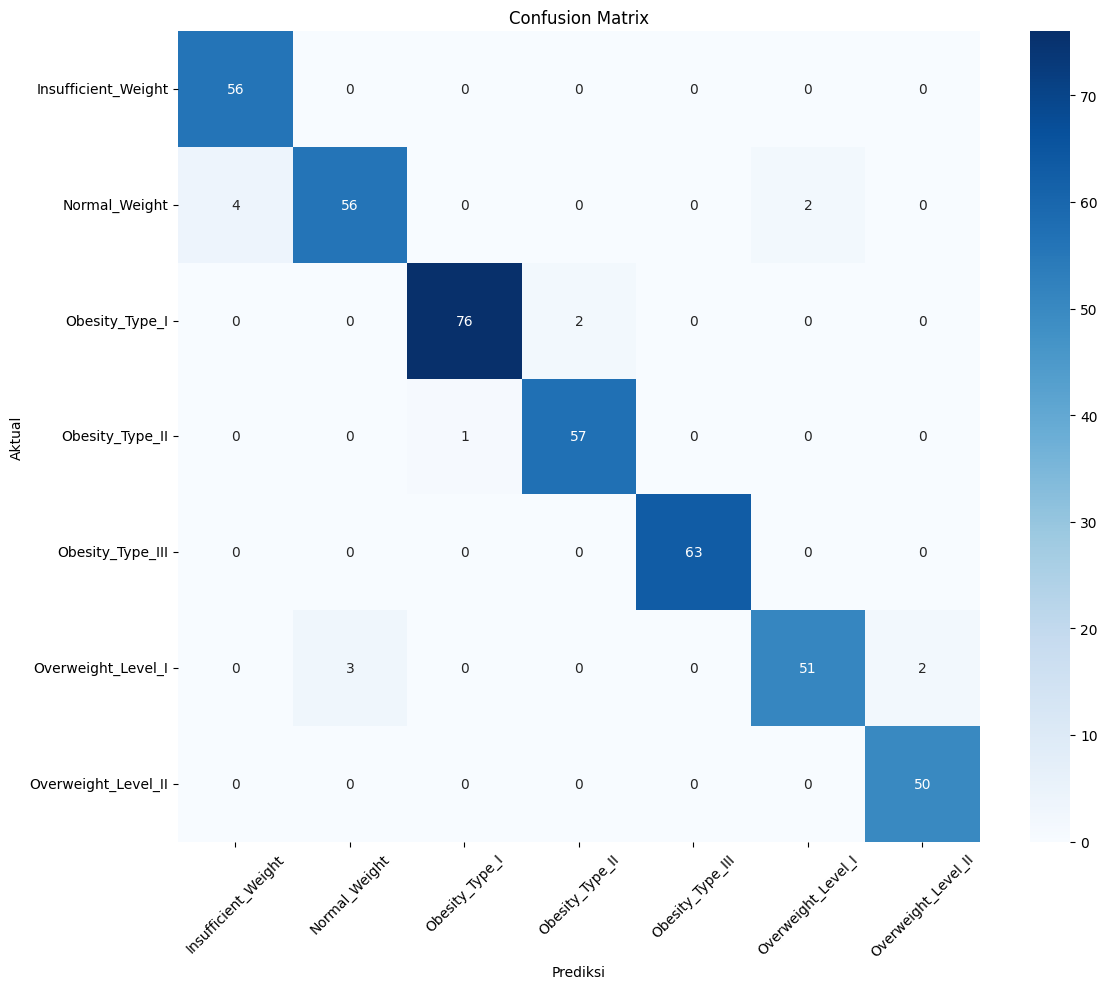

In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Classification report
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Laporan klasifikasi:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.97        56
      Normal_Weight       0.95      0.90      0.93        62
     Obesity_Type_I       0.99      0.97      0.98        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.96      0.91      0.94        56
Overweight_Level_II       0.96      1.00      0.98        50

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



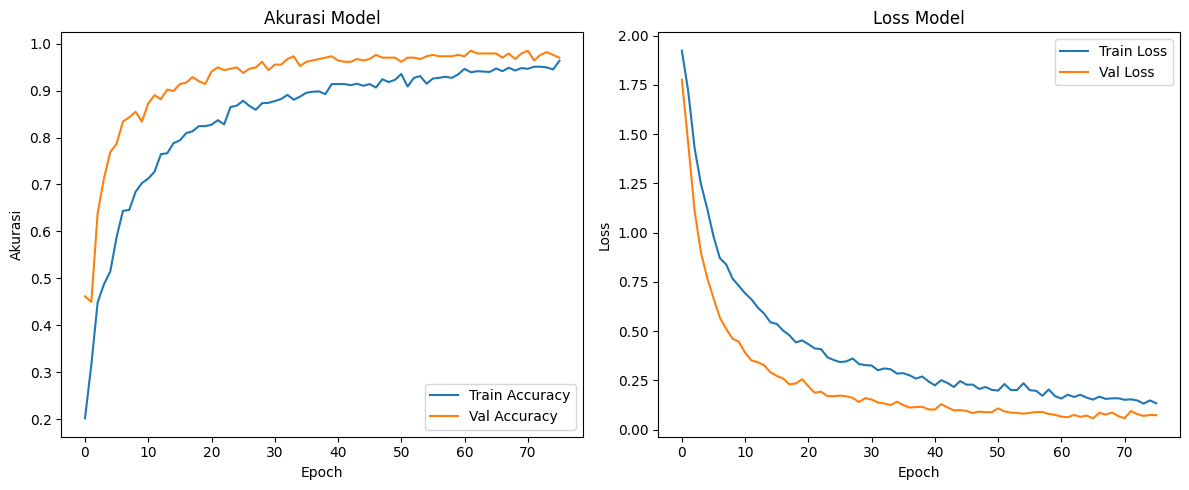

In [26]:
# Visualisasi metrik training
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Inferensi dengan Data Baru

In [27]:
# Contoh data baru
new_data = pd.DataFrame([{
    'Age': 22,
    'Gender': le_dict['Gender'].transform(['Male'])[0],
    'Height': 1.75,
    'Weight': 85,
    'family_history_with_overweight': le_dict['family_history_with_overweight'].transform(['yes'])[0],
    'FAVC': le_dict['FAVC'].transform(['yes'])[0],
    'FCVC': 2.0,
    'NCP': 3.0,
    'CAEC': le_dict['CAEC'].transform(['Sometimes'])[0],
    'SMOKE': le_dict['SMOKE'].transform(['no'])[0],
    'CH2O': 2.0,
    'SCC': le_dict['SCC'].transform(['no'])[0],
    'FAF': 1.0,
    'TUE': 1.0,
    'CALC': le_dict['CALC'].transform(['Sometimes'])[0],
    'MTRANS': le_dict['MTRANS'].transform(['Public_Transportation'])[0]
}])

print("Data inferensi sebelum preprocessing:")
print(new_data)

Data inferensi sebelum preprocessing:
   Age  Gender  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0   22       1    1.75      85                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
0  3.0     2      0   2.0    0  1.0  1.0     2       3  


In [28]:
# Normalisasi fitur numerik
new_data[fitur_numerik] = scaler.transform(new_data[fitur_numerik])

print("\nData inferensi setelah preprocessing:")
print(new_data)


Data inferensi setelah preprocessing:
        Age  Gender    Height    Weight  family_history_with_overweight  FAVC  \
0 -0.364507       1  0.518024 -0.060571                               1     1   

       FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0 -0.785019  0.404153     2      0 -0.013073    0 -0.012109  0.561997     2   

   MTRANS  
0       3  


In [29]:
# Prediksi
prediction_proba = model.predict(new_data)
predicted_class_idx = np.argmax(prediction_proba[0])
predicted_class = label_encoder.inverse_transform([predicted_class_idx])[0]

print(f"\nPrediksi kelas obesitas: {predicted_class}")
print(f"\nProbabilitas per kelas: {prediction_proba[0]}")
for i, kelas in enumerate(label_encoder.classes_):
    print(f"{kelas}: {prediction_proba[0][i]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Prediksi kelas obesitas: Overweight_Level_II

Probabilitas per kelas: [2.6413256e-06 1.6914353e-03 8.9809229e-04 2.0001628e-06 6.7263704e-07
 1.3793862e-01 8.5946649e-01]
Insufficient_Weight: 0.0000
Normal_Weight: 0.0017
Obesity_Type_I: 0.0009
Obesity_Type_II: 0.0000
Obesity_Type_III: 0.0000
Overweight_Level_I: 0.1379
Overweight_Level_II: 0.8595


Simpan Model

In [30]:
# Simpan model dalam format TensorFlow SavedModel
model_dir = "saved_model_obesity"
tf.saved_model.save(model, model_dir)
print(f"Model TensorFlow telah disimpan di: {model_dir}")

INFO:tensorflow:Assets written to: saved_model_obesity/assets


INFO:tensorflow:Assets written to: saved_model_obesity/assets


Model TensorFlow telah disimpan di: saved_model_obesity


In [31]:
# Konversi model ke format ONNX
!python -m tf2onnx.convert --saved-model {model_dir} --output model_obesity.onnx
print("\nProses selesai!")

E0000 00:00:1747574646.508763   19998 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747574646.512259   19998 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747574646.522353   19998 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747574646.522383   19998 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747574646.522387   19998 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747574646.522391   19998 computation_placer.cc:177] computation placer already registered. Please check linka